# DATA 602 Final Project - Sneaker Resale Valuation

Eddie Xu

1. Research Question
What is the most valued sneaker in the after market in 2023, compared to 2019?

2. Justification - why is this relevant to you or industry?
Sneakers have been prominent in the Hip Hop Music industry for decades and now it's a cultural phenomenon. We now call those who are part of this ongoing trend "Sneakerheads." With that in mind, multi-million dollar brands such as Adidas, Nike, Reebok, and New Balance are the leading competitors and are profiting off limited edition sneakers that sell unique colors, makes, and seasonal footwear. 

3. Data Sources - did you find this data online or collect yourself? Provide links.
The data sources used for the project are coming from kaggles

- 2023 data: https://www.kaggle.com/datasets/ajiaron/stockx-sneaker-data
- 2019 data: https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

4. Libraries potentially being used.
- Pandas: Since the data source is from csv files, the library is needed for ETL process.
- NumPy: The library is needed since calculations will be used to determine the sneaker value
- Seaborn The library is needed to develop data visualizations and views.
- Sklearn: The library used for linear regression


In [77]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="white")

# load ml dependencies
from sklearn import preprocessing, metrics
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder

In [51]:
# load data
sneaker_2019_data = pd.read_csv("Resources/sneakers2019.csv")
sneaker_2023_data = pd.read_csv("Resources/sneakers2023.csv") 

In [52]:
# check the type of the 2019 sneaker data
sneaker_2019_data.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

# Data Wrangling

In [53]:
# clean up and convert the sneaker name
sneaker_2019_data['Sneaker Name'] = sneaker_2019_data['Sneaker Name'].astype('string').str.replace('-', ' ')

In [54]:
# convert objects to strings to remove regex then convert to int
sneaker_2019_data['Sale Price'] = sneaker_2019_data['Sale Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)
sneaker_2019_data['Retail Price'] = sneaker_2019_data['Retail Price'].astype(str).str.replace('$', '').astype(int)

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_19052/1867256717.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sneaker_2019_data['Sale Price'] = sneaker_2019_data['Sale Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(int)
/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_19052/1867256717.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sneaker_2019_data['Retail Price'] = sneaker_2019_data['Retail Price'].astype(str).str.replace('$', '').astype(int)


In [55]:
# calculate the difference in value from Sale Price to Retail Price
sneaker_2019_data["Profit/Difference"] = sneaker_2019_data["Sale Price"] - sneaker_2019_data["Retail Price"]
sneaker_2019_data["Price Change Percentage (%)"] = round(sneaker_2019_data["Profit/Difference"]/sneaker_2019_data["Retail Price"], 2) * 100

sneaker_2019_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit/Difference,Price Change Percentage (%)
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California,877,399.0
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California,465,211.0
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California,470,214.0
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky,855,389.0
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island,608,276.0


In [56]:
sneaker_2019_data["Above Retail"] = sneaker_2019_data["Sale Price"] > sneaker_2019_data["Retail Price"]
sneaker_2019_data["Bought for Retail"] = sneaker_2019_data["Sale Price"] == sneaker_2019_data["Retail Price"]
sneaker_2019_data["Below Retail"] = sneaker_2019_data["Sale Price"] < sneaker_2019_data["Retail Price"]

sneaker_2019_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit/Difference,Price Change Percentage (%),Above Retail,Bought for Retail,Below Retail
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California,877,399.0,True,False,False
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California,465,211.0,True,False,False
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California,470,214.0,True,False,False
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky,855,389.0,True,False,False
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island,608,276.0,True,False,False


In [57]:
# convert date to datetime
sneaker_2019_data['Order Date'] = pd.to_datetime(sneaker_2019_data['Order Date'])
sneaker_2019_data['Release Date'] = pd.to_datetime(sneaker_2019_data['Release Date'])

In [58]:
sneaker_2019_group = round(sneaker_2019_data.groupby('Sneaker Name')['Profit/Difference'].mean(),2)

sneaker_2019_group.head()

Sneaker Name
Adidas Yeezy Boost 350 Low Moonrock              796.71
Adidas Yeezy Boost 350 Low Oxford Tan            811.51
Adidas Yeezy Boost 350 Low Pirate Black 2015     695.09
Adidas Yeezy Boost 350 Low Pirate Black 2016     784.24
Adidas Yeezy Boost 350 Low Turtledove           1331.66
Name: Profit/Difference, dtype: float64

# Data Visual on 2019 Sneakers

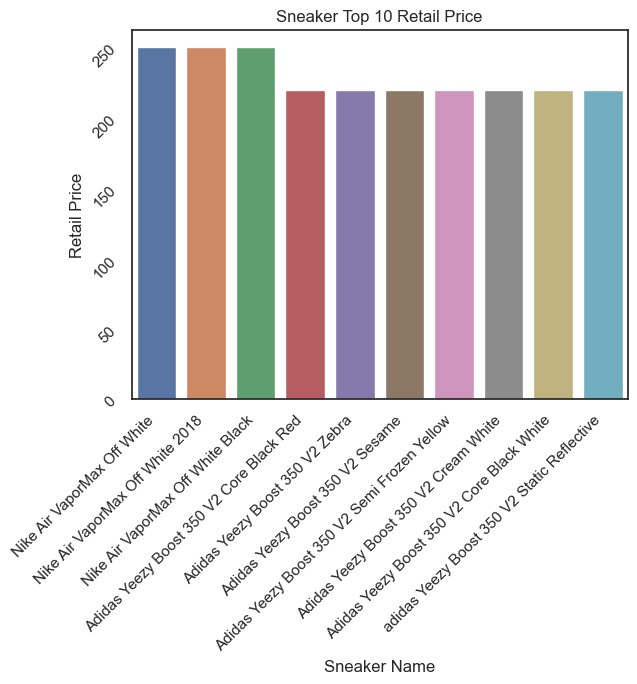

In [78]:
# bar plot on sneakers with highest retail prices
sneaker_retail_idx = sneaker_2019_data.groupby('Sneaker Name')['Retail Price'].idxmax()
sneaker_2019_retail = sneaker_2019_data.loc[sneaker_retail_idx]

retail_ax1 = sns.barplot(x = 'Sneaker Name',
                          y = 'Retail Price',
                          data = sneaker_2019_retail.sort_values('Retail Price', ascending=False).head(10))

retail_ax1.set(title = 'Sneaker Top 10 Retail Price')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

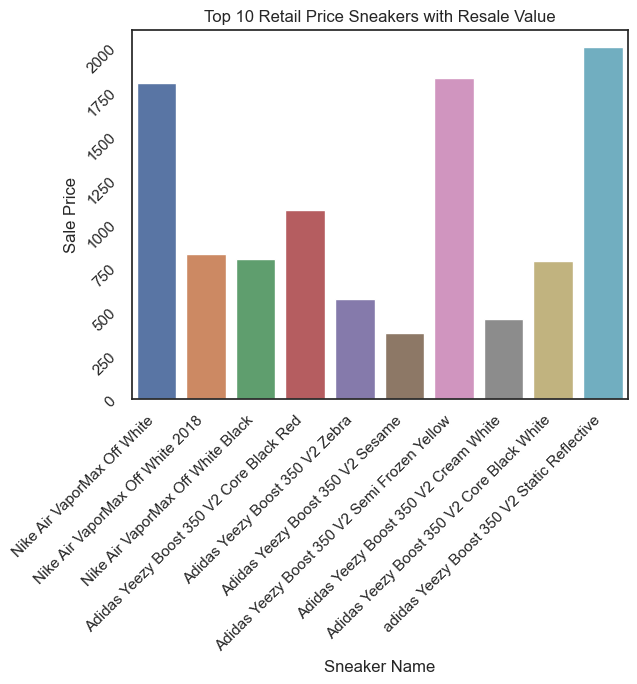

In [79]:
retail_top10 = sneaker_2019_retail.sort_values('Retail Price', ascending=False).head(10)

retail_ax2 = sns.barplot(x = 'Sneaker Name',
                          y = 'Sale Price',
                          data = retail_top10)

retail_ax2.set(title = 'Top 10 Retail Price Sneakers with Resale Value')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

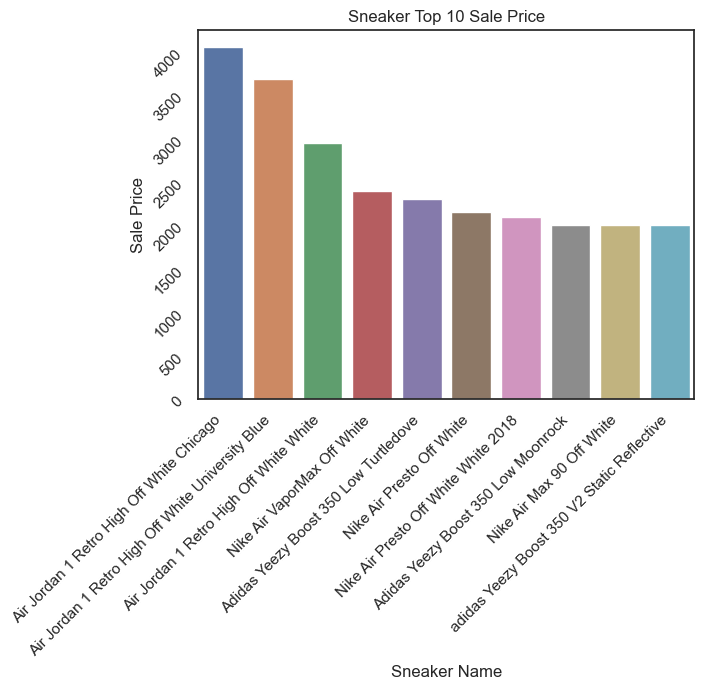

In [80]:
# find the highest resale value in each sneaker sold
sneaker_resale_idx = sneaker_2019_data.groupby('Sneaker Name')['Sale Price'].idxmax()
sneaker_2019_resale = sneaker_2019_data.loc[sneaker_resale_idx]

# bar plot
sneaker_ax1 = sns.barplot(x = 'Sneaker Name',
                          y = 'Sale Price',
                          data = sneaker_2019_resale.sort_values('Sale Price', ascending=False).head(10))

sneaker_ax1.set(title = 'Sneaker Top 10 Sale Price')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [61]:
sneaker_2023_data.dtypes

Unnamed: 0                 int64
item                      object
brand                     object
retail                     int64
release                   object
lowestAsk                  int64
numberOfAsks               int64
salesThisPeriod            int64
highestBid                 int64
numberOfBids               int64
annualHigh                 int64
annualLow                  int64
volatility               float64
deadstockSold              int64
pricePremium             float64
averageDeadstockPrice      int64
lastSale                   int64
changePercentage         float64
dtype: object

In [62]:
sneaker_2023_new_data = sneaker_2023_data[['item', 'brand', 'retail', 'annualHigh', 'annualLow', 
                                           'volatility', 'pricePremium', 'lastSale', 'changePercentage']]

sneaker_2023_new_data['changePercentage'] = round(sneaker_2023_new_data['changePercentage'], 2)* 100

sneaker_2023_new_data.head()

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_19052/1728614097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaker_2023_new_data['changePercentage'] = round(sneaker_2023_new_data['changePercentage'], 2)* 100


,item,brand,retail,annualHigh,annualLow,volatility,pricePremium,lastSale,changePercentage
0,Jordan 4 Retro SB Pine Green,Jordan,225,952,280,0.061347,0.542,347,0.0
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,757,150,0.115522,0.111,234,2.0
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,4831,705,0.232434,1.125,850,-13.0
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,550,150,0.095096,0.200,180,0.0
4,MSCHF Big Red Boot,MSCHF,350,2445,498,0.186197,1.373,831,4.0


<AxesSubplot:>

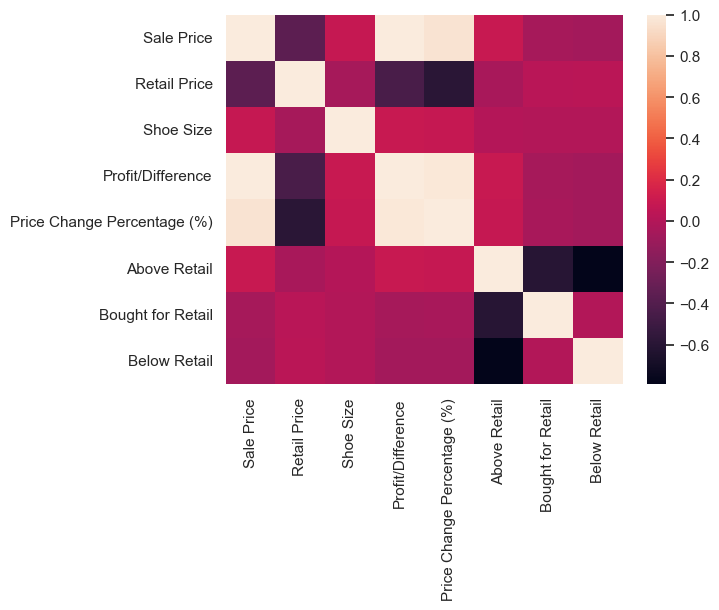

In [63]:
# heat map
sneaker_2019_correlation = sneaker_2019_data.corr()
sns.heatmap(sneaker_2019_correlation)


In [64]:
# machine learning model
sneaker_2019_train_data = sneaker_2019_data[['Brand', 'Sneaker Name', 'Sale Price', 'Retail Price', 
                                             'Profit/Difference', 'Above Retail', 'Bought for Retail', 'Below Retail']]

In [65]:
# train data by dropping the Sale Price, Above Retail, Bought for Retail, Below Retail
X = sneaker_2019_train_data.drop(['Sale Price', 'Above Retail', 'Bought for Retail', 'Below Retail'], axis=1)
y = sneaker_2019_train_data['Sale Price']
X_train, X_valid, y_train, y_valid = tts(X, y, test_size=0.2)

In [66]:
# convert sneaker name which is caterogical into numerical data
object_cols = ['Sneaker Name','Brand']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Adding the column names after one hot encoding
OH_cols_train.columns = OH_encoder.get_feature_names_out(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names_out(object_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

/Users/eddiexuexia/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [67]:
# peform linear regression
sneaker_lm = lm.LinearRegression()
sneaker_lm.fit(OH_X_train,y_train)

LinearRegression()

In [68]:
sneaker_coeff= pd.DataFrame(sneaker_lm.coef_, OH_X_train.columns,columns=['Coefficient'])
ranked_sneaker = sneaker_coeff.sort_values("Coefficient", ascending = False)
ranked_sneaker

,Coefficient
Sneaker Name_Nike Air VaporMax Off White,76.321511
Sneaker Name_Nike Air VaporMax Off White Black,76.321511
Sneaker Name_Nike Air VaporMax Off White 2018,76.321511
Sneaker Name_Nike React Hyperdunk 2017 Flyknit Off White,23.046724
Sneaker Name_Nike Zoom Fly Mercurial Off White Total Orange,23.046724
Sneaker Name_Nike Zoom Fly Mercurial Off White Black,23.046724
Brand_ Yeezy,18.939768
Sneaker Name_Nike Air Max 97 Off White,12.391767
Sneaker Name_Air Jordan 1 Retro High Off White Chicago,12.391767
Sneaker Name_Nike Air Max 97 Off White Black,12.391767


In [69]:
# create a prediction value
sneaker_predictions = sneaker_lm.predict(OH_X_valid)